In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data preprocessing

ML practitioners spend far more time evaluating, cleaning, and transforming data than building models. As an ML engineer, you will spend enormous amounts of your time tossing out bad examples and cleaning up the salvageable ones.

In this lecture, we will cover important concepts and techniques related to handling missing data, outliers, categorical variables, feature creation, feature scaling and normalisation. These topics are fundamental for preparing data before training a machine learning algorithm to produce a **model**. We will explore practical approaches and strategies that will enable you to produce high-quality, consistent input data that the model can process without being misled by errors or anomalies.



# 1. Handling missing data

Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of missing data is relatively common in almost all datasets and can have a significant effect on the conclusions that can be drawn from the data: missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions.

In [ ]:
import pandas as pd
import numpy as np

# Creating a sample dataframe with missing values
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5],
        'C': [1, 2, 3, None, 5]}
df = pd.DataFrame(data)
print(df)

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  NaN  3.0  3.0
3  4.0  4.0  NaN
4  5.0  5.0  5.0


When dealing with missing values, it is important to have effective strategies in place to deal with them. Now we will show techniques such as imputation and exclusion to handle missing data, enabling you to make informed decisions and maintain the integrity of your analyses.

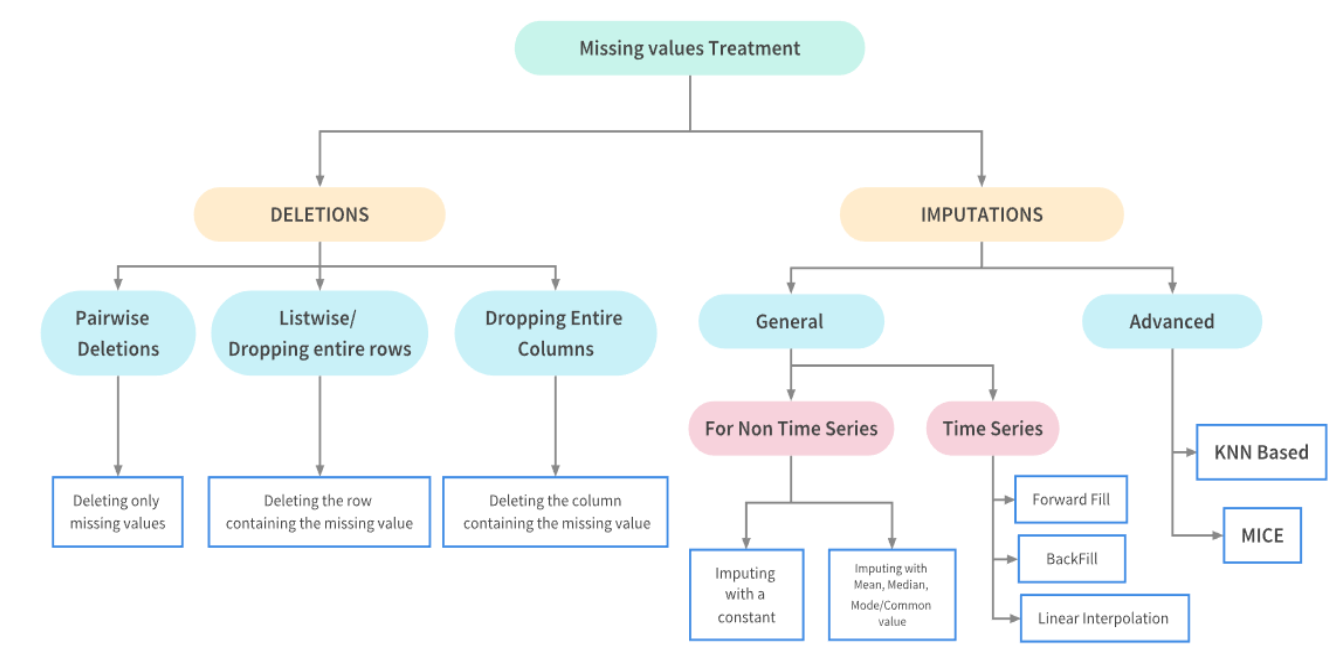

In [15]:
from PIL import Image
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/2. Data processing/1_missing_full_esquema.PNG')

## 1.1 Deletions

Deletions in missing values treatment refer to the process of removing or excluding rows or columns from a dataset that contain missing values. <be>

Types of deletions:

### 1.1.1 Listwise deletions

Used when values are **missing completely at random** (MCAR).
In machine learning (and statistics more generally), when we say that values are Missing Completely at Random, we mean that the probability that a value is missing **does not depend on either the observed data or the unobserved (missing) data**. In other words:

- The missingness is entirely unrelated to the dataset itself.

- The fact that a value is missing is like a random "coin flip," independent of both the variable with missing entries and any other variables.

Consider the following example. Suppose you’re conducting a survey on incomes:

- If some questionnaires are lost in the mail at random, the missingness is MCAR.

- But if younger people are less likely to answer income questions, then the missingness depends on age (observed). This is **Missing at Random (MAR)**.

- If people with very high incomes are less likely to report their income, then missingness depends on the value itself (unobserved). This is **Missing Not at Random (MNAR)**.





During listwise deletion, only the missing values are deleted. Notice that all operations in Pandas, like mean, sum, etc, intrinsically skip missing values.

In [ ]:
import pandas as pd


# Creating a sample dataframe with missing values
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5],
        'C': [1, 2, 3, None, 5]}
df = pd.DataFrame(data)

# Applying listwise deletion
df_listwise_deleted = df.dropna()

# Displaying the original and listwise deleted dataframes
print("Original DataFrame:")
display(df)
print("\nListwise Deleted DataFrame:")
### 1.1.1 Listwise deletions
display(df_listwise_deleted)

Original DataFrame:


,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,NaN
4,5.0,5.0,5.0



Listwise Deleted DataFrame:


,A,B,C
1,2.0,2.0,2.0
4,5.0,5.0,5.0


### 1.1.2 Dropping complete columns

If a column contains a large number of missing values, which we could arbitrarily set to say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, None],
    'B': [5, None, 7, 8, 9],
    'C': [None, 1, None, None, None],
    'D': [10, 11, 12, 13, 14]
}

df = pd.DataFrame(data)

# Calculate the percentage of missing values in each column
missing_percentages = df.isnull().sum() / len(df) * 100

# Define the threshold for dropping columns (80% or more missing values)
threshold = 80

# Get the column names that exceed the threshold
columns_to_drop = missing_percentages[missing_percentages >= threshold].index

# Drop the columns from the DataFrame
df_dropped = df.drop(columns_to_drop, axis=1)

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
display(df_dropped)

Original DataFrame:


,A,B,C,D
0,1.0,5.0,NaN,10
1,2.0,NaN,1.0,11
2,3.0,7.0,NaN,12
3,4.0,8.0,NaN,13
4,NaN,9.0,NaN,14



DataFrame after dropping columns:


,A,B,D
0,1.0,5.0,10
1,2.0,NaN,11
2,3.0,7.0,12
3,4.0,8.0,13
4,NaN,9.0,14


## 1.2 Imputations

Imputation refers to converting an incomplete example to a complete example by providing well-reasoned guesses for the missing values. There are multiple ways to impute missing values, depending upon the nature of the problem and data.

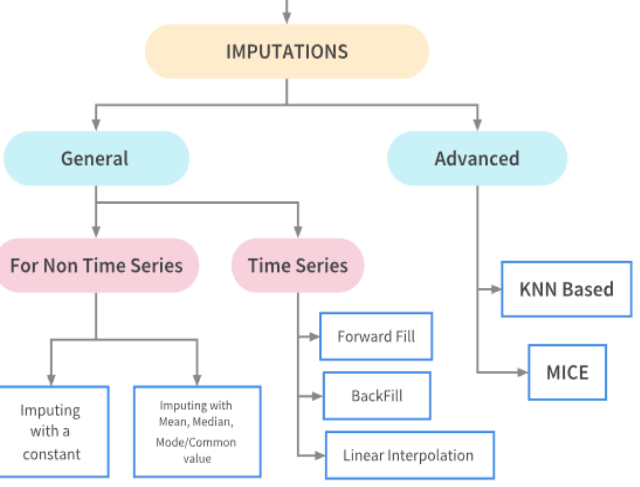

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/2. Data processing/2_missing_imputation.PNG')

### 1.2.1 Imputing with a constant

Imputes a constant value to all NaN. In practice, imputing with a constant is not meant to recover the true missing values — it’s mainly a **pragmatic trick** to either keep the pipeline running or make “missing” itself an explicit feature.

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)
CONSTANT = 2

# Impute missing values with a constant (e.g., 0)
imputed_df = df.fillna(CONSTANT)

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,2.0,12.0
2,2.0,8.0,13.0
3,4.0,9.0,2.0
4,5.0,10.0,15.0


### 1.2.2 Imputing with the mean, median or mode

One common technique is to use the mean, median, or mode as the imputed value. 
In general, use the following rules of thumb:

- Use mean when data is symmetric and outlier-free.

- Use median when data is skewed or has outliers.

- Use mode for categorical features.


The following example imputes a missing value with the mean value of its column.

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)

# Impute missing values with the mean of the column
imputed_df = df.fillna(df.mean())

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.00,11.00
1,2.0,8.25,12.00
2,3.0,8.00,13.00
3,4.0,9.00,12.75
4,5.0,10.00,15.00


### 1.2.3 Imputing with a constant

**Forward fill for time series**<br>
Replace a NaN with the last observed value in a time series.

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)

# Impute missing values using forward fill
imputed_df = df.fillna(method='ffill')

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,6.0,12.0
2,2.0,8.0,13.0
3,4.0,9.0,13.0
4,5.0,10.0,15.0


### 1.2.4 Backfill for time series

Replace a missing value (NaN) with the next observed value in a time series.

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)

# Impute missing values using backfill
imputed_df = df.fillna(method='bfill')

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,8.0,12.0
2,4.0,8.0,13.0
3,4.0,9.0,15.0
4,5.0,10.0,15.0


### 1.2.5 Linear interpolation for time series

This technique assumes a linear relationship between data points. Then, it interpolates the value of a missing data point by utilising non-missing values from adjacent data points.

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

df = pd.DataFrame(data)

# Impute missing values using linear interpolation
imputed_df = df.interpolate()

# Print the original DataFrame
print("Original DataFrame:")
display(df)

# Print the DataFrame after imputation
print("\nDataFrame after imputation:")
display(imputed_df)

Original DataFrame:


,A,B,C
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,9.0,NaN
4,5.0,10.0,15.0



DataFrame after imputation:


,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,9.0,14.0
4,5.0,10.0,15.0


## 1.3 Exercises

For each dataset:
* Find the missing values
* Select an appropriate approach to impute them

In [ ]:
# Dataframe 1

import pandas as pd
import numpy as np

# Create a time series dataset with missing data
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
data = {'Value': [10, 15, np.nan, 20, 30, np.nan, 35, 40,  np.nan, 50]}
df = pd.DataFrame(data, index=dates)

# Print the original DataFrame
print("Original DataFrame:")
display(df)

Original DataFrame:


,Value
2023-01-01,10.0
2023-01-02,15.0
2023-01-03,NaN
2023-01-04,20.0
2023-01-05,30.0
2023-01-06,NaN
2023-01-07,35.0
2023-01-08,40.0
2023-01-09,NaN
2023-01-10,50.0


In [ ]:
# Dataframe 2
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a dataset with missing data
data = {
    'age': [25, 30, 65, 75, 25, np.nan, 20, 40, 60, 65],
    'height': [160, 165, np.nan, np.nan, 170, 175, 180, 185, np.nan, np.nan],
    'weight': [60, 65, 60, np.nan, 75, np.nan, np.nan, 80, 85, 90]
}

df = pd.DataFrame(data)

# Print the original DataFrame
print("Original DataFrame:")
display(df)


Original DataFrame:


,age,height,weight
0,25.0,160.0,60.0
1,30.0,165.0,65.0
2,65.0,NaN,60.0
3,75.0,NaN,NaN
4,25.0,170.0,75.0
5,NaN,175.0,NaN
6,20.0,180.0,NaN
7,40.0,185.0,80.0
8,60.0,NaN,85.0
9,65.0,NaN,90.0


In [ ]:
# Dataframe 3
import pandas as pd
import numpy as np

# Create a dataset with 5 columns
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': [1, np.nan, 3, 4, np.nan],
    'D': [np.nan, np.nan, np.nan, np.nan, np.nan],
    'E': [np.nan, np.nan, 3, np.nan, np.nan]
}

df = pd.DataFrame(data)


print("Original DataFrame:")
display(df)

Original DataFrame:


,A,B,C,D,E
0,1.0,NaN,1.0,NaN,NaN
1,2.0,2.0,NaN,NaN,NaN
2,NaN,3.0,3.0,NaN,3.0
3,4.0,NaN,4.0,NaN,NaN
4,5.0,5.0,NaN,NaN,NaN


**Solutions**:

In [2]:
# Dataset1: Imputed with ffil (any kind of time series imputation would work)


Original DataFrame:


,Value
2023-01-01,10.0
2023-01-02,15.0
2023-01-03,NaN
2023-01-04,20.0
2023-01-05,30.0
2023-01-06,NaN
2023-01-07,35.0
2023-01-08,40.0
2023-01-09,NaN
2023-01-10,50.0



DataFrame after imputation:


,Value
2023-01-01,10.0
2023-01-02,15.0
2023-01-03,15.0
2023-01-04,20.0
2023-01-05,30.0
2023-01-06,30.0
2023-01-07,35.0
2023-01-08,40.0
2023-01-09,40.0
2023-01-10,50.0


In [3]:
# Dataframe 2


Original DataFrame:


,age,height,weight
0,25.0,160.0,60.0
1,30.0,165.0,65.0
2,65.0,NaN,60.0
3,75.0,NaN,NaN
4,25.0,170.0,75.0
5,NaN,175.0,NaN
6,20.0,180.0,NaN
7,40.0,185.0,80.0
8,60.0,NaN,85.0
9,65.0,NaN,90.0



DataFrame after imputation:


,age,height,weight
0,25.0,160.0,60.000000
1,30.0,165.0,65.000000
2,65.0,172.5,60.000000
3,75.0,172.5,73.571429
4,25.0,170.0,75.000000
5,45.0,175.0,73.571429
6,20.0,180.0,73.571429
7,40.0,185.0,80.000000
8,60.0,172.5,85.000000
9,65.0,172.5,90.000000


In [6]:
# Dataframe3: Since some columns have many NaNs, we remove them


Original DataFrame:


,A,B,C,D,E
0,1.0,NaN,1.0,NaN,NaN
1,2.0,2.0,NaN,NaN,NaN
2,NaN,3.0,3.0,NaN,3.0
3,4.0,NaN,4.0,NaN,NaN
4,5.0,5.0,NaN,NaN,NaN


Missing Percentage:


A     20.0
B     40.0
C     40.0
D    100.0
E     80.0
dtype: float64


Filtered Dataset:


,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,3.0
3,4.0,NaN,4.0
4,5.0,5.0,NaN


# 2. Handling outliers

Outliers are data points which lie at an abnormal distance from other points in a random sample from a population. In statistics, an outlier is a data point that differs significantly from other observations. They may be due to variability in the measurement or may indicate experimental errors. <br>

Outliers often cause problems in model training, so **finding outliers is very important**.

Outliers can skew trends and forecasts modelled from datasets, negatively impacting the quality and accuracy of decisions. Actively monitoring and performing outlier detection is essential prior to training machine learning models. If outliers are not identified and removed, models may become less accurate.

To summarise, there are multiple reasons why outlier detection/handling matters:

1. **They may reflect data quality issues.** Outliers often indicate data entry errors, faulty sensors, or preprocessing bugs. Catching them early improves dataset reliability.
2. **They can hurt training stability.**
3. **They can bias parameter estimates.** For instance, the regression line of a linear regression model and the decision boundary from a logistic regression model might be pulled far from the true trend by a few extreme values (outliers).
4. **They can distort feature scaling.** Feature scaling is essential to prepare data prior to training a model. If you apply normalisation (min–max) or standardisation (z-scores), outliers will stretch the scale, making normal points compressed near zero.
5. **They can reduce model generalisation.** Models may overfit to rare, noisy points instead of capturing the main data distribution.





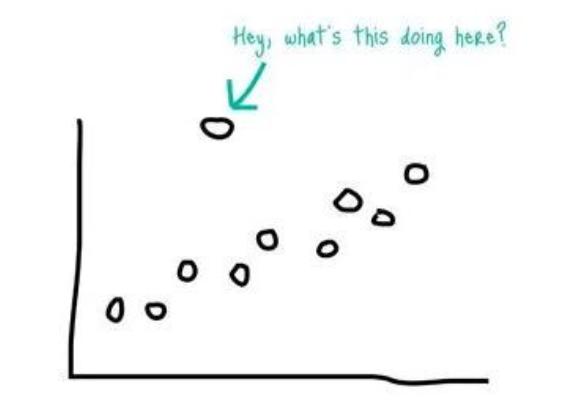

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/2. Data processing/3_outliers_!.PNG')

## 2.1 Types of outliers

### 2.1.1 Point outlier

An individual data point that sits outside of the range of the rest of the dataset. There may be a clear pattern, trend or grouping within the dataset, and an outlier as a data point will be significantly different to this. Point outliers can often be attributed to an error with the measurement or input of the data.

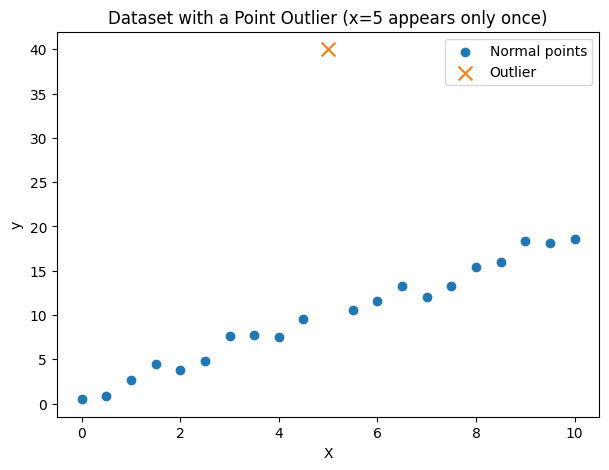

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Normal points deliberately exclude the neighborhood around x=5
X_left = np.linspace(0, 4.5, 10)
X_right = np.linspace(5.5, 10, 10)
X = np.concatenate([X_left, X_right])
y = 2 * X + np.random.normal(0, 1, size=X.shape)

# Outlier
x_out, y_out = 5, 40

# Plot (points only)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Normal points")
plt.scatter([x_out], [y_out], s=100, marker="x", label="Outlier")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dataset with a Point Outlier (x=5 appears only once)")
plt.legend()
plt.show()


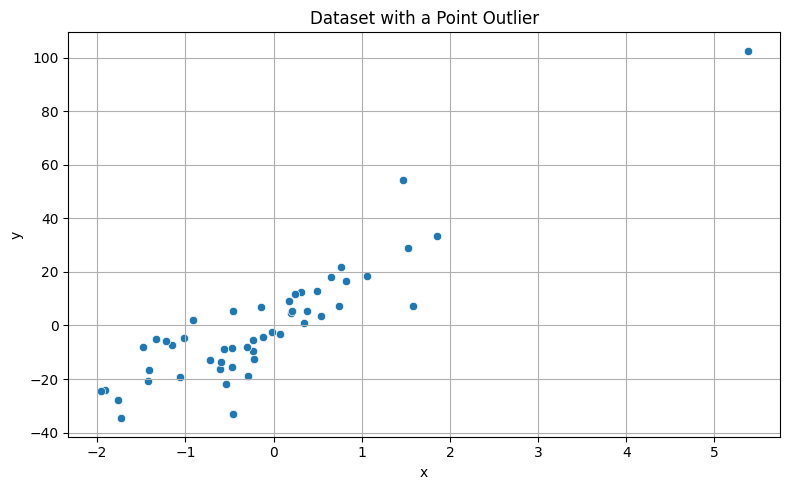

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=50, n_features=1, noise=10, random_state=42)

# 2. Convert to a pandas DataFrame with renamed columns
df = pd.DataFrame({"x": X.flatten(), "y": y})

# 3. Introduce a single outlier (extreme point)
outlier_index = 25
df.loc[outlier_index, "x"] = df["x"].mean() + 6 * df["x"].std()
df.loc[outlier_index, "y"] = df["y"].mean() + 6 * df["y"].std()

# 4. Visualise the dataset with the outlier
plt.figure(figsize=(8, 5))
sns.scatterplot(x="x", y="y", data=df)
plt.title("Dataset with a Point Outlier")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.1.2 Contextual outliers

A contextual outlier is a data point that is significantly different from the dataset, but only within a specific context. The context of a dataset may change seasonally or fluctuate with wider economic trends or behaviour. A contextual outlier will be noticeable when the context of the dataset changes. This could be seasonal weather changes, economic fluctuations, changes in customer behaviour for holidays, or even the time of the day. For this reason, a contextual outlier may seem like a normal data point in other contexts.

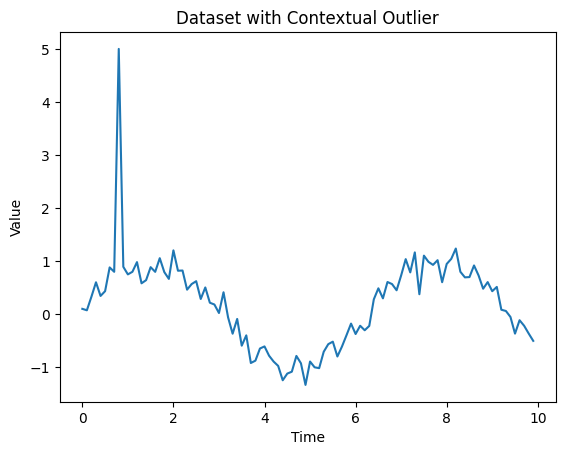

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time series data
np.random.seed(42)

# Define the time range
t = np.arange(0, 10, 0.1)

# Generate the time series values
data = np.sin(t) + np.random.normal(0, 0.2, len(t))

# Add an outlier
outlier_index = np.random.randint(0, len(t))
data[outlier_index] = 5  # Set the value of the outlier point

# Plot the time series data
plt.plot(t, data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Dataset with Contextual Outlier')
plt.show()

### 2.1.3 Collective outliers

A collective outlier appears when a group of data points differ significantly from the trend in the rest of the dataset. The individual data points within a collective outlier may not seem like a point outlier or a contextual outlier. It is when the data points are considered as a collection that anomalous patterns are observed. For this reason, collective outliers can be the hardest type of outlier to identify.

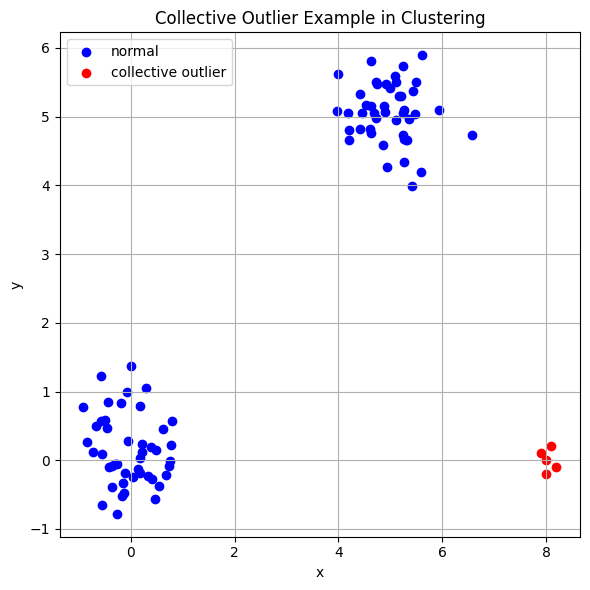

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Normal clusters
cluster1 = np.random.normal(loc=[0, 0], scale=0.5, size=(45, 2))
cluster2 = np.random.normal(loc=[5, 5], scale=0.5, size=(45, 2))

# Collective outlier (small group far from main clusters)
outliers = np.array([[8, 0], [8.1, 0.2], [8.2, -0.1], [7.9, 0.1], [8, -0.2]])

# Combine data
data = np.vstack([cluster1, cluster2, outliers])

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(data[:90, 0], data[:90, 1], label="normal", color="blue")
plt.scatter(data[90:, 0], data[90:, 1], label="collective outlier", color="red")
plt.title("Collective Outlier Example in Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The main clusters (in blue) represent normal data.

A small group of tightly grouped points (in red) forms a separate "mini-cluster" far from the main data. Each point looks normal in isolation, but together they form an unexpected pattern, making them a collective outlier.

#### Summary

| Type                   | Description                                               |
| ---------------------- | --------------------------------------------------------- |
| **Point outlier**      | A single instance is abnormal                             |
| **Contextual outlier** | An instance is outlier **given a context** (e.g., time)   |
| **Collective outlier** | A **group** of normal points behaving abnormally together |


## 2.2 Outlier Detection Techniques

### 2.2.1 Interquartile Range Method

The concept of the Interquartile Range (IQR) is used to build boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below the boxplot lower whisker (Q1 − 1.5x IQR) or above the boxplot upper whisker(Q3 + 1.5x IQR). It can be visually represented by the box plot.

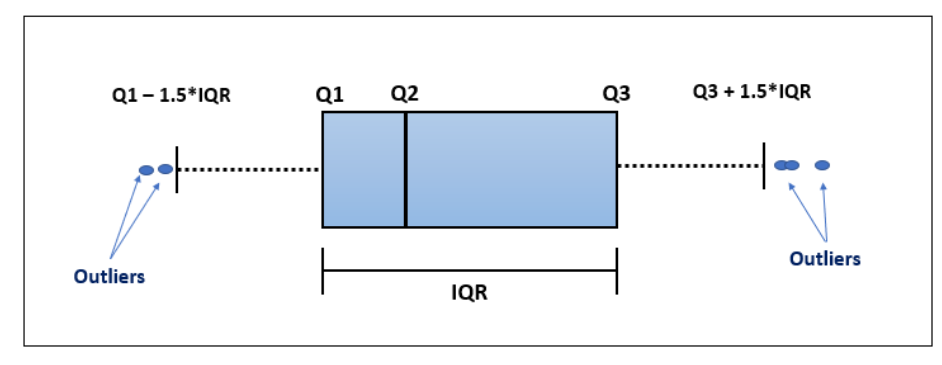

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/2. Data processing/4_outliers_iqr.PNG')

**Example**: Plotting a boxplot with Seaborn

List of data:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, -25, -100, 200]


Text(0.5, 1.0, 'Representation of the data')

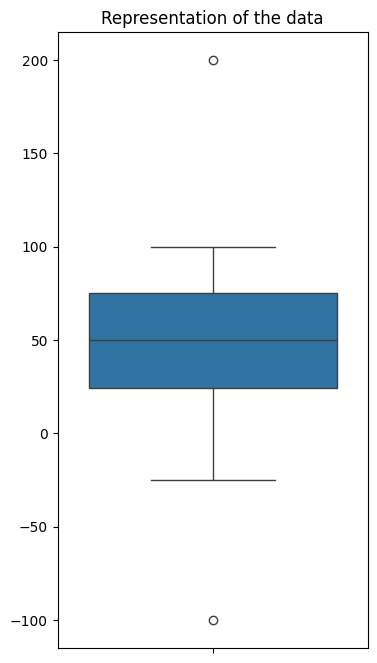

In [ ]:
import seaborn as sns

# Define data
data = list(range(1, 100+1))
data.extend([-25, -100, 200])
print('List of data:')
print(data)

# Plot boxplot
plt.figure(figsize = (4,8))
sns.boxplot(y = data)
plt.title('Representation of the data')

It is rather straightforward to detect outliers using IQRs as shown in the following snippet of code.

In [ ]:
# Detect outliers

# Calculate quartiles 25% and 75%
q25, q75 = np.quantile(data, 0.25), np.quantile(data, 0.75)

# calculate the IQR
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5

# calculate the lower and upper bound value
lower, upper = q25 - cut_off, q75 + cut_off

# Calculate the number of records below and above the upper and lower bounds, respectively
outliers = [x for x in data if (x >= upper) | (x <= lower)]

# Print basic information (can be removed)
print('The IQR is',iqr)
print('The lower bound value is', lower)
print('The upper bound value is', upper)
print('The list of outliers are', outliers)

The IQR is 51.0
The lower bound value is -52.0
The upper bound value is 152.0
The list of outliers are [-100, 200]


### 2.2.2 Standard Deviation Method

Standard deviation is a metric of variance, i.e. how much the individual data points are spread out from the mean. In statistics, if a data distribution is approximately normal, then about 68% of the data values lie within one standard deviation of the mean, about 95% are within two standard deviations, and about 99.7% lie within three standard deviations. With that in mind, we have to choose where to set the threshold for outlier detection.

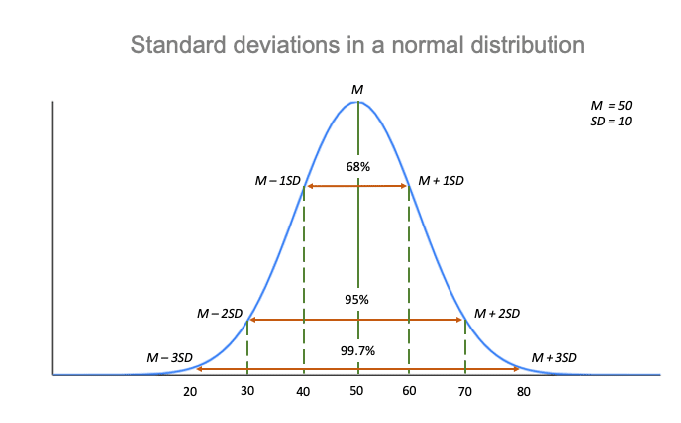

In [ ]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/2. Data processing/5_outliers_sd.PNG')

The mean is 50.06837994588648
The std is 9.802715029966269
The lower bound value is 20.66023485598767
The upper bound value is 79.47652503578529
The list of outliers are [88.52731490654722, 17.58732659930927, 80.78880808455239]


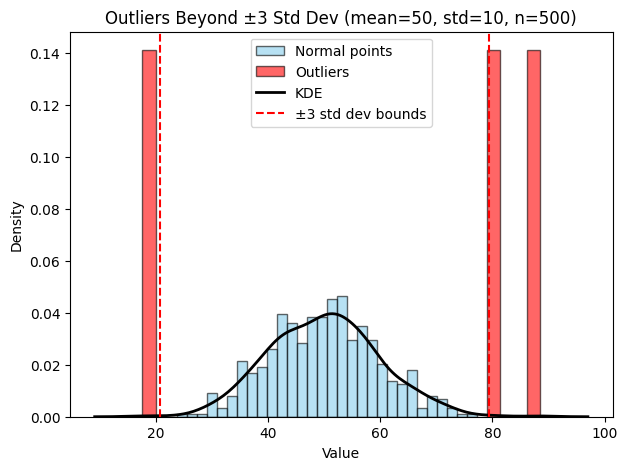

([88.52731490654722, 17.58732659930927, 80.78880808455239], 3)

In [ ]:
import numpy as np

# Set random seed for reproducibility (optional)
np.random.seed(42)

# Parameters
mean = 50
std = 10
n_samples = 500

# Sample from normal distribution
data = np.random.normal(loc=mean, scale=std, size=n_samples)

# Recompute mean and std because we assume we don't know how we generated data but we know it follows a normal distribution
threshold=3.0
mean = np.mean(data)
std = np.std(data)
cutoff = threshold * std
lower_bound = mean - cutoff
upper_bound = mean + cutoff

# Calculate the number of records below and above lower and above bound value respectively
outliers = [x for x in data if (x >= upper_bound) | (x <= lower_bound)]
normal_points = data[(data >= lower_bound) & (data <= upper_bound)]


# Print basic information
print('The mean is',mean)
print('The std is',std)
print('The lower bound value is', lower_bound)
print('The upper bound value is', upper_bound)
print('The list of outliers are', outliers)

# Plot histogram + KDE
plt.figure(figsize=(7, 5))
plt.hist(normal_points, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Normal points")
plt.hist(outliers, bins=30, density=True, alpha=0.6, color="red", edgecolor="black", label="Outliers")
sns.kdeplot(data, color="black", linewidth=2, label="KDE")

# Add cutoff lines
plt.axvline(lower_bound, color="red", linestyle="--", label="±3 std dev bounds")
plt.axvline(upper_bound, color="red", linestyle="--")

plt.title("Outliers Beyond ±3 Std Dev (mean=50, std=10, n=500)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

outliers[:10], len(outliers)


## 2.3 How to handle outliers

To know what to do with outliers, we have to carefully analyse what type of outliers we have found.
Outliers can fall into any of the following categories:
* The outlier is due to a **mistake**. For example, perhaps an experimenter mistakenly entered an extra zero, or perhaps an instrument that gathered data malfunctioned. You'll generally <ins>**delete**</ins> examples containing mistake outliers.
* The outlier is a **legitimate data point**, not a mistake. In this case, will your trained model ultimately need to infer good predictions on these outliers?
    * If yes, keep these outliers in your training set. After all, outliers in certain features sometimes mirror outliers in the label, so the outliers could actually help your model make better predictions. Also, you often cannot easily identify whether or not an extreme value is a part of the population of interest or not. Still, be careful! Extreme outliers can still hurt your model.
    * If no, delete the outliers or recode them (apply more invasive feature engineering techniques):
        * **Delete:** Although this is the most straightforward option, this strategy bears a high risk of losing information. Especially if you find many outlying data points. Try to avoid it.
        * **Recode:** Recoding outliers is a good option to treat outliers and keep as much information as possible simultaneously. This option should always be accompanied by sound reasoning and explanation. There are several recoding strategies:
            * Imputation
            * Clipping
            * Winsorising


### 2.3.1 Imputation

 Imputation techniques involve replacing outliers with estimated values based on other data points. This can be done using various imputation methods such as mean imputation, median imputation, or regression imputation.

Here’s a simple example where outliers are just a few extreme values in an otherwise stable distribution, making mean imputation a reasonable strategy. Imagine we measured the weights of 12 packages in kilograms:

In [ ]:
import pandas as pd

# Most values cluster around 5–6 kg, but 3 are clear errors (e.g., wrong units entered)
data = pd.Series([5.1, 4.9, 5.3, 6.0, 5.5, 5.2, 4.8, 120, -50, 5.6, 6.1, 200])
print("Original data:")
print(data)

Original data:
0       5.1
1       4.9
2       5.3
3       6.0
4       5.5
5       5.2
6       4.8
7     120.0
8     -50.0
9       5.6
10      6.1
11    200.0
dtype: float64


Why would mean imputation work well here?

- The true distribution is centered near ~5.5 kg.
- The outliers (120, -50, 200) are clearly data-entry errors (maybe grams or wrong input).
- Replacing them with the mean of the valid weights avoids skewing the dataset.

In [ ]:
# Compute IQR-based bounds
Q1, Q3 = data.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Identify outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Replace outliers with the mean of non-outliers
mean_value = data[~outliers].mean()
data_imputed = data.mask(outliers, mean_value)

print("\nImputed data:")
print(data_imputed)


Imputed data:
0     5.100000
1     4.900000
2     5.300000
3     6.000000
4     5.500000
5     5.200000
6     4.800000
7     5.388889
8     5.388889
9     5.600000
10    6.100000
11    5.388889
dtype: float64


## Exercise

Given the following dataset

[8, 9, 10, 11, None, 13, 15, 18, 22, 400]

Impute the missing value, but considering that we need to keep the outlier (400).  

## Solution

In [ ]:
import pandas as pd
import numpy as np

# Example data with one missing value
data = pd.Series([8, 9, 10, 11, np.nan, 13, 15, 18, 22, 400])
print("Original data:")
print(data)

# Mean imputation
mean_value = data.mean(skipna=True)
data_mean_imputed = data.fillna(mean_value)

# Median imputation
median_value = data.median(skipna=True)
data_median_imputed = data.fillna(median_value)

print("\nMean value used for imputation:", mean_value)
print("Median value used for imputation:", median_value)

print("\nData after mean imputation:")
print(data_mean_imputed)

print("\nData after median imputation:")
print(data_median_imputed)


Original data:
0      8.0
1      9.0
2     10.0
3     11.0
4      NaN
5     13.0
6     15.0
7     18.0
8     22.0
9    400.0
dtype: float64

Mean value used for imputation: 56.22222222222222
Median value used for imputation: 13.0

Data after mean imputation:
0      8.000000
1      9.000000
2     10.000000
3     11.000000
4     56.222222
5     13.000000
6     15.000000
7     18.000000
8     22.000000
9    400.000000
dtype: float64

Data after median imputation:
0      8.0
1      9.0
2     10.0
3     11.0
4     13.0
5     13.0
6     15.0
7     18.0
8     22.0
9    400.0
dtype: float64


Notice how the mean imputation inserts a value far from the bulk of the data (56.2), while the median imputation inserts a realistic value (13).

**Why median is better here:** the distribution is **right-skewed** with a large outlier. Median is robust to outliers, while the mean is not.

**General rule:** prefer median imputation for **skewed** or **heavy-tailed** features (incomes, housing prices, wait times, transaction amounts), or when outliers are present.

### 2.3.2 Clipping

Clipping is fast and simple. It truncates outliers in a hard way: it replaces any value above a max threshold with the max and any value below a min threshold with the min. This flattens extreme values to fixed bounds. Its a simple rule-based truncation; common in neural networks (e.g., gradient clipping).

For example, suppose that <0.5% of values for a particular feature fall outside the range 40–60. In this case, you could do the following:

* Clip all values over 60 (the maximum threshold) to be exactly 60.
* Clip all values under 40 (the minimum threshold) to be exactly 40.

Clipping is convenient when **outliers are genuine, extreme values that may harm training**, and you want a middle ground between removal and full imputation.


### 2.3.3 Winsorising

Winsorising is more statistically principled. It is a **specific case of clipping** based on quantiles.

It is used when you want to dampen outliers without distorting summary statistics like the mean. It replaces the extreme values (e.g., bottom 5%, top 5%) with the nearest value within a given percentile range. For example, in a 5% winsorisation, the lowest 5% of data points are replaced by the value at the 5th percentile, and the highest 5% are replaced by the value at the 95th percentile. Winsorising smooths extremes while keeping them within the data's range.

The goal of winsorising is **to reduce the effect of outliers while preserving distributional shape**.


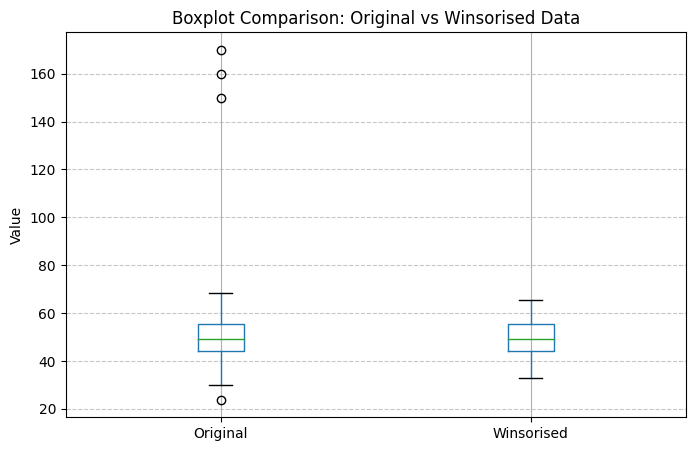

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Generate synthetic data with some outliers
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
data_with_outliers = np.append(data, [150, 160, 170])  # Add extreme outliers

# Apply winsorization: cap the lowest 5% and highest 5%
winsorized_data = winsorize(data_with_outliers, limits=[0.05, 0.05])

# Create DataFrame for side-by-side boxplots
df = pd.DataFrame({
    "Original": data_with_outliers,
    "Winsorised": winsorized_data
})

# Plot side-by-side boxplots
plt.figure(figsize=(8, 5))
df.boxplot(column=["Original", "Winsorised"])
plt.title("Boxplot Comparison: Original vs Winsorised Data")
plt.ylabel("Value")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()

Here’s the side-by-side boxplot:

* Original data: the whiskers are stretched upward, and the extreme outliers (150, 160, 170) are clearly visible.

* Winsorised data: those outliers have been clipped to the 95th percentile, so the boxplot looks tighter and more symmetric.

This figure makes it clear how winsorisation reduces the influence of extreme values while keeping the dataset intact.

# 3. Dealing with categorical data

Machine learning algorithms require numerical data. More precisely, every value in a feature vector must be a floating-point value. However, many features are naturally strings or other non-numerical values. Consequently, non-numerical values must be represented as numerical values.

**Encoding** means converting categorical or other data to numerical vectors that a model can train on. This conversion is necessary because machine learning algorithms can only train on floating-point values; models cannot train on strings such as "dog" or "maple".

We differentiate between two types of categorical variables:

* **Nominal variables** represent categories without any intrinsic order or hierarchy. For example, colours (red, blue, green) or countries (USA, UK, Germany) are nominal variables. In machine learning, nominal variables cannot be directly used in mathematical models because they lack numerical properties.  

* **Ordinal variables**  represent categories with a clear order or ranking. For example, educational degrees (high school, bachelor's, master's, PhD) or survey ratings (strongly disagree, disagree, neutral, agree, strongly agree) are ordinal variables. Unlike nominal variables, ordinal variables can be encoded in a way that captures the inherent order.


## 3.1 Types of encoding

### 3.1.1 One-Hot Encoding

When a categorical feature has a <ins>low number</ins> of possible categories, you can encode it as a **vocabulary**. With a vocabulary encoding, the model treats each possible categorical value as a *separate feature*.

The next step in building a vocabulary is to convert each index number to its **one-hot encoding**. In a one-hot encoding:
* Each category is represented by a vector (array) of N elements, where N is the number of categories. For example, if feature *car_colour* has eight possible categories, then the one-hot vector representing it will have eight elements.
* Exactly one of the elements in a one-hot vector has the value 1.0; all the remaining elements have the value 0.0.

To summarise, one-hot-encoding transforms each category of a **nominal variable** into a binary vector where each element represents the presence or absence of the category.


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a dataframe with a categorical variable
df = pd.DataFrame({'id': [1,2,3,4],
                   'car_colour': ['red', 'blue', 'green', 'red']})

# Apply one-hot encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['car_colour']]).toarray()

# Convert the encoded data back to a dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out (['car_colour']))


# Concatenate the encoded dataframe with the 'id' column
encoded_df = pd.concat([df['id'], encoded_df], axis=1)

print('Original data:')
display(df)
print('\nEncoded data:')
display(encoded_df)

Original data:


,id,car_colour
0,1,red
1,2,blue
2,3,green
3,4,red



Encoded data:


,id,car_colour_blue,car_colour_green,car_colour_red
0,1,0.0,0.0,1.0
1,2,1.0,0.0,0.0
2,3,0.0,1.0,0.0
3,4,0.0,0.0,1.0


**Note**: when the number of categories is high, one-hot encoding is usually a bad choice.
**Embeddings** are a much better choice. Embeddings [1] substantially reduce the number of dimensions, which benefits models in two important ways:
* The model typically trains faster.
* The built model typically infers predictions more quickly. That is, the model has *lower latency*.

[1] Chollet, Francois. Deep learning with Python. Simon and Schuster, 2021.


### 3.1.2 Label Encoding

Label encoding is a method that assigns a unique integer (numeric value) to each category in a categorical variable. This transformation is arbitrary and does not imply any order or rank among the categories.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a dataframe with an ordinal variable
data = {'id': [1,2,3,4],
        'degree': ['blue', 'yellow',  'green', 'black']}
df = pd.DataFrame(data)

print('Original data:')
display(df)

# Apply label encoding
encoder = LabelEncoder()
df['degree_encoded'] = encoder.fit_transform(df['degree'])


print('\nEncoded data:')
display(df)

Original data:


,id,degree
0,1,blue
1,2,yellow
2,3,green
3,4,black



Encoded data:


,id,degree,degree_encoded
0,1,blue,1
1,2,yellow,3
2,3,green,2
3,4,black,0


### 3.1.3 Ordinal Encoding

Ordinal Encoding is similar to Label Encoding, but it explicitly specifies the mapping of categories to numerical values based on their order or ranking. It is suitable for **ordinal variables** where the order or hierarchy among the categories is known and needs to be preserved explicitly.

In [ ]:
import pandas as pd

# Create a dataframe with an ordinal variable
data = {'id': [1,2,3,4],
        'education': ['high school', 'bachelor', 'bachelor', 'master']}
df = pd.DataFrame(data)

# Define the mapping for ordinal encoding
mapping = {'high school': 1, 'bachelor': 2, 'master': 3}

print('Original data:')
display(df)

# Apply ordinal encoding to the 'color' column using the mapping
df['education_encoded'] = df['education'].map(mapping)


print('\nEncoded data:')
display(df)


Original data:


,id,education
0,1,high school
1,2,bachelor
2,3,bachelor
3,4,master



Encoded data:


,id,education,education_encoded
0,1,high school,1
1,2,bachelor,2
2,3,bachelor,2
3,4,master,3


### 3.1.4 Target Encoding

Target encoding, also known as *mean encoding*, replaces a categorical value with a **numerical statistic of the target variable**, typically the **mean of the target** for that category.

So instead of one-hot encoding ["red", "blue", "green"], you map them to something like:

- red: average target value for red

- blue: average target value for blue

- green: average target value for green

The following example considers house prices in different neighbourhoods.

In [ ]:
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    "neighborhood": ["A", "A", "B", "B", "C", "C", "C"],
    "price": [200, 220, 150, 180, 300, 310, 320]
})

print('Original data:')
display(df)

# Step 1: Compute mean target per category
mean_encoded = df.groupby("neighborhood")["price"].mean()

print(mean_encoded)

# Step 2: Map categories to their target mean
df["neighborhood_encoded"] = df["neighborhood"].map(mean_encoded)
display(df)



Original data:


,neighborhood,price
0,A,200
1,A,220
2,B,150
3,B,180
4,C,300
5,C,310
6,C,320


neighborhood
A    210.0
B    165.0
C    310.0
Name: price, dtype: float64


,neighborhood,price,neighborhood_encoded
0,A,200,210.0
1,A,220,210.0
2,B,150,165.0
3,B,180,165.0
4,C,300,310.0
5,C,310,310.0
6,C,320,310.0


Now the categorical column *neighborhood* is replaced with a numeric representation that directly encodes its **relationship with the target** (price).

When to use it:

* When you have high-cardinality categorical features (hundreds or thousands of categories). Example: ZIP codes, product IDs, user IDs.

* When one-hot encoding would create too many features.

* In tree-based models, where target encoding often performs well.

## 3.2 Handling high-cardinality categorical variables

Handling high-cardinality categorical variables refers to the techniques used to deal with categorical variables that have a large number of unique categories or levels. High-cardinality variables can pose challenges in machine learning models due to the increased dimensionality and potential sparsity of the data. <br>

It's important to note that the choice of handling high-cardinality categorical variables depends on the specific dataset, problem domain, and the algorithms or models being used. It's recommended to experiment with different techniques and evaluate their impact on model performance, considering factors such as interpretability, computational efficiency, and generalization capabilities. <br>

Here are a few common approaches to handle high-cardinality categorical variables:

* Target Encoding: Target encoding (also known as mean encoding) replaces each category with the mean of the target variable for that category. It can be effective when there is a correlation between the categorical variable and the target variable. However, target encoding may be prone to overfitting, especially when there are categories with very few instances.

* Frequency Encoding: Frequency encoding replaces each category with its frequency (count) within the dataset. It can be useful when the frequency of occurrence provides meaningful information. However, like target encoding, it may be sensitive to rare categories.

* Grouping Categories: For high-cardinality variables with numerous categories, it may be beneficial to group them into broader categories. This can be done based on domain knowledge, business rules, or statistical analysis. Grouping helps reduce the number of unique levels and captures the underlying patterns or similarities in the data.

## 3.3 Exercises

Use the most appropiate encoder for each dataframe, and encode ALL the categorical variables.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Dataframe1: Create 1000 rows with 200 unique ZIP codes
# Scenario: Predicting purchase amount by ZIP code
# Feature: zip_code (thousands of unique values)
# Target: spending (continuous)

n = 1000
zip_codes = [f"{10000+i}" for i in range(200)]
df1 = pd.DataFrame({
    "zip_code": np.random.choice(zip_codes, size=n),
    "spending": np.random.normal(200, 50, size=n)  # target
})


#Dataframe2

data2 = {
    'patient_number': [1, 2, 3, 4, 5, 6],
    'pain_intensity': ['Mild', 'Moderate', 'Severe', 'Moderate', 'Mild', 'Extreme']
}

df2 = pd.DataFrame(data2)

#Dataframe3:

data3 = {
    'id': [1, 2, 3, 4, 5, 6],
    'vehicle': ['Toyota', 'Ford', 'Honda', 'Chevrolet', 'Ford', 'Toyota'],
    'marital_status': ['Single', 'Married', 'Divorced', 'Single', 'Married', 'Divorced']
}

df3 = pd.DataFrame(data3)

**Solution**

,zip_code,spending,zip_code_encoded
0,10102,273.971696,203.938736
1,10179,299.306820,223.605536
2,10092,123.846188,210.322507
3,10014,143.206725,185.188215
4,10106,211.299864,225.836750
5,10071,241.987372,213.254433
6,10188,199.438628,207.971794
7,10020,118.100298,176.672260
8,10102,224.828908,203.938736
9,10121,190.287431,201.006221



Dataframe2:


,patient_number,pain_intensity,pain_intensity_encoded
0,1,Mild,1
1,2,Moderate,2
2,3,Severe,3
3,4,Moderate,2
4,5,Mild,1
5,6,Extreme,4



Dataframe3:


,id,vehicle,marital_status,vehicle_Chevrolet,vehicle_Ford,vehicle_Honda,vehicle_Toyota,marital_status_Divorced,marital_status_Married,marital_status_Single
0,1,Toyota,Single,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Ford,Married,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,Honda,Divorced,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,Chevrolet,Single,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,Ford,Married,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,6,Toyota,Divorced,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# 3.4 Categorical data: Common issues

Numerical data is often recorded by scientific instruments or automated measurements. Categorical data, on the other hand, is often categorised by human beings or by machine learning models. Who decides on categories and labels, and how they make those decisions, affects the reliability and usefulness of that data.

Data manually labelled by human beings is often referred to as *gold labels*, and is considered more desirable than machine-labelled data for training models, due to relatively better data quality.

Machine-labelled data, where categories are automatically determined by one or more classification models, is often referred to as *silver labels*. Machine-labelled data can vary widely in quality.

Try to get a sense of the quality and biases of machine labels and annotations in your data before training on it.

**TOP TIP**
Looking at your data by hand is a good exercise regardless of how you obtained your data. Andrej Karpathy did this on ImageNet and [**wrote about the experience**](https://karpathy.github.io/2014/09/02/what-i-learned-from-competing-against-a-convnet-on-imagenet/).

Categorical data tends to produce high-dimensional feature vectors; that is, feature vectors having a large number of elements. High dimensionality increases training costs and makes training more difficult. For these reasons, ML experts often seek ways to reduce the number of dimensions prior to training.

For natural-language data, the main method of reducing dimensionality is to convert feature vectors to **embedding vectors**.



# 4. Feature creation

Feature creation is the process of transforming existing data into new features that can provide additional information and improve the performance of machine learning models. It involves extracting meaningful insights or patterns from the existing data and representing them in a way that is more suitable for the model to learn from.

## 4.1 Splitting

In feature engineering, splitting refers to the process of dividing a single feature into multiple, more informative sub-features. This is especially useful when a feature is compound or contains multiple pieces of information in one field. Some common examples are:

| Original Feature        | Splitting Result                          |
| ----------------------- | ----------------------------------------- |
| `"2023-07-12 14:35:00"` | `year`, `month`, `day`, `hour`, `weekday` |
| `"John_Doe"`            | `first_name = John`, `last_name = Doe`    |
| `"New York, NY"`        | `city = New York`, `state = NY`           |
| `"A12B34"`              | `prefix = A12`, `suffix = B34`            |
| `"USD 12.99"`           | `currency = USD`, `amount = 12.99`        |


**Example:** splitting dates

In [ ]:
import pandas as pd

# Create a sample dataframe
data = {
    'date': ['2023-06-24', '2023-06-25', '2023-06-26'],
    'sales': [100, 150, 200]
}
df = pd.DataFrame(data)

df_original = df.copy()

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create new features based on date
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print('Original data:')
display(df_original)

print('\nData with new features:')
display(df)


Original data:


,date,sales
0,2023-06-24,100
1,2023-06-25,150
2,2023-06-26,200



Data with new features:


,date,sales,day_of_week,month,year
0,2023-06-24,100,5,6,2023
1,2023-06-25,150,6,6,2023
2,2023-06-26,200,0,6,2023


**Example:** splitting names

In [ ]:
import pandas as pd

# Create a dictionary with data
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8],
    'composed_name': ['John Kennedy', 'Hanna Montana', 'Robert Smith', 'James Johnson',
                      'Emily Davis', 'Christopher Lee', 'Michael Wilson', 'Sarah Brown']
}

# Create the DataFrame
df = pd.DataFrame(data)
df_original = df.copy()

# Split 'composed_name' into 'title' and 'name' columns
df[['first_name', 'last_name']] = df['composed_name'].str.split(' ', n=1, expand=True)

print('Original data:')
display(df_original)

print('\nData with new features:')
display(df)

Original data:


,id,composed_name
0,1,John Kennedy
1,2,Hanna Montana
2,3,Robert Smith
3,4,James Johnson
4,5,Emily Davis
5,6,Christopher Lee
6,7,Michael Wilson
7,8,Sarah Brown



Data with new features:


,id,composed_name,first_name,last_name
0,1,John Kennedy,John,Kennedy
1,2,Hanna Montana,Hanna,Montana
2,3,Robert Smith,Robert,Smith
3,4,James Johnson,James,Johnson
4,5,Emily Davis,Emily,Davis
5,6,Christopher Lee,Christopher,Lee
6,7,Michael Wilson,Michael,Wilson
7,8,Sarah Brown,Sarah,Brown


# 5. Normalisation (feature scaling)

Normalisation (feature scaling) is an **essential step** before employing many machine learning algorithms.
After examining your data through statistical and visualisation techniques, you should transform your data in ways that help your model train more effectively. The goal of normalisation is to transform features to be on a similar scale.
It involves transforming input features to a common scale, usually in the range of 0 to 1 or with a mean of 0 and a standard deviation of 1. The following benefits account for the importance of normalisation:

* **Faster convergence:** Normalisation helps models converge more quickly during training.

* **Better models:** Normalisation helps algorithm convergence and training stability, leading to better models.

* **Better predictions:** Normalisation helps models make better predictions. When different features have different ranges, the resulting model might make somewhat less useful predictions.

* **Prevents bias towards features:** Machine learning algorithms that rely on **distance metrics** (e.g., k-NN, k-means, SVMs) are sensitive to scale. Normalisation prevents bias towards features with larger scales, ensuring that each feature contributes equally.
    
* **Avoids the "NaN trap":** Normalisation helps avoid the "NaN trap" when feature values are very high. NaN is an abbreviation for not a number. When a value in a model exceeds the floating-point precision limit, the system sets the value to NaN instead of a number. When one number in the model becomes a NaN, other numbers in the model also eventually become a NaN.

It is important to note that not all machine learning algorithms require feature scaling. Decision trees, random forests, and algorithms based on ensemble methods are typically insensitive to feature scaling. However, it's generally a good practice to apply feature scaling to maintain consistency and avoid potential issues when switching algorithms or incorporating new features into the model.

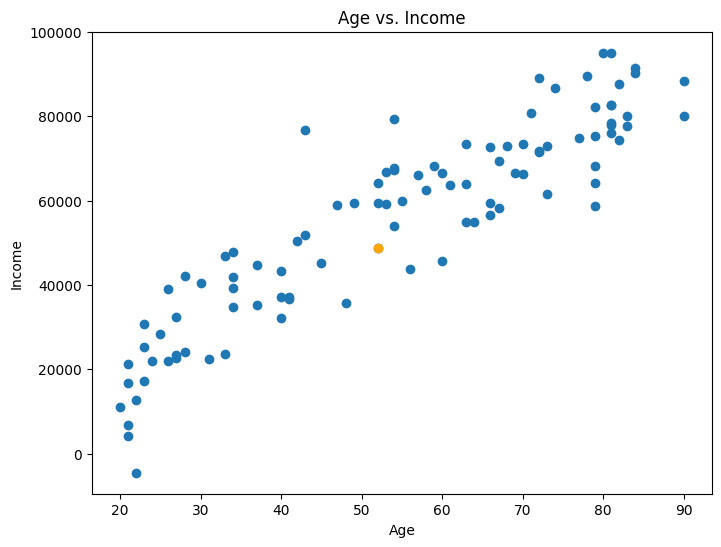

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n = 100  # Number of data points
age = np.random.randint(20, 91, size=n)
income = age * 1000 + np.random.normal(0, 10000, size=n)
id = np.arange(1, n+1)

# Create a DataFrame from the data
data = pd.DataFrame({'ID': id, 'Age': age, 'Income': income})

# Highlight the data point
TARGET_ID = 85
highlight_data = data[data['ID'] == TARGET_ID]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(age, income)
plt.scatter(highlight_data['Age'], highlight_data['Income'], color='orange')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()



Find the 5 closest neighbors using Euclidean distance

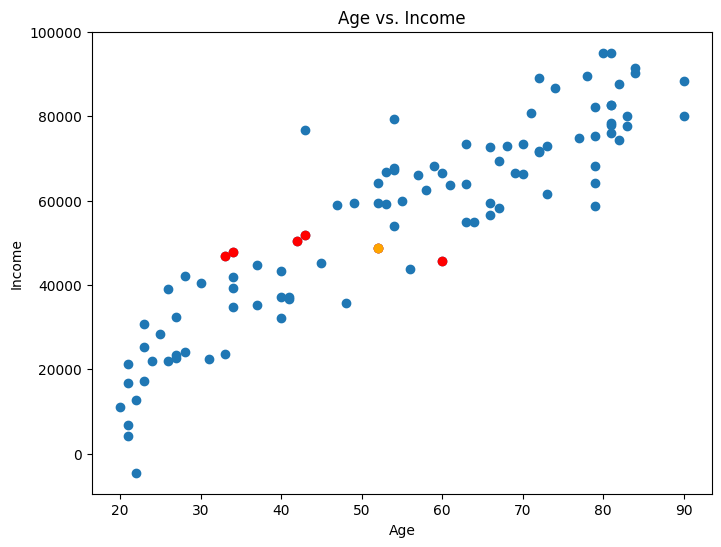

In [ ]:
from scipy.spatial.distance import cdist

# Find the 5 points closest to id
target_row = data[data['ID'] == TARGET_ID]
distances = cdist(target_row[['Age', 'Income']], data[['Age', 'Income']])
closest_indices = np.argsort(distances.squeeze())[:6]
closest_data = data.iloc[closest_indices]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Income'])
plt.scatter(closest_data['Age'], closest_data['Income'], color='red')
plt.scatter(highlight_data['Age'], highlight_data['Income'], color='orange')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()

In [ ]:
closest_data

,ID,Age,Income
84,85,52,48755.090422
22,23,34,47718.621335
93,94,42,50474.014326
61,62,33,46923.257535
67,68,43,51735.894156
86,87,60,45599.585523


Now recheck scaling data

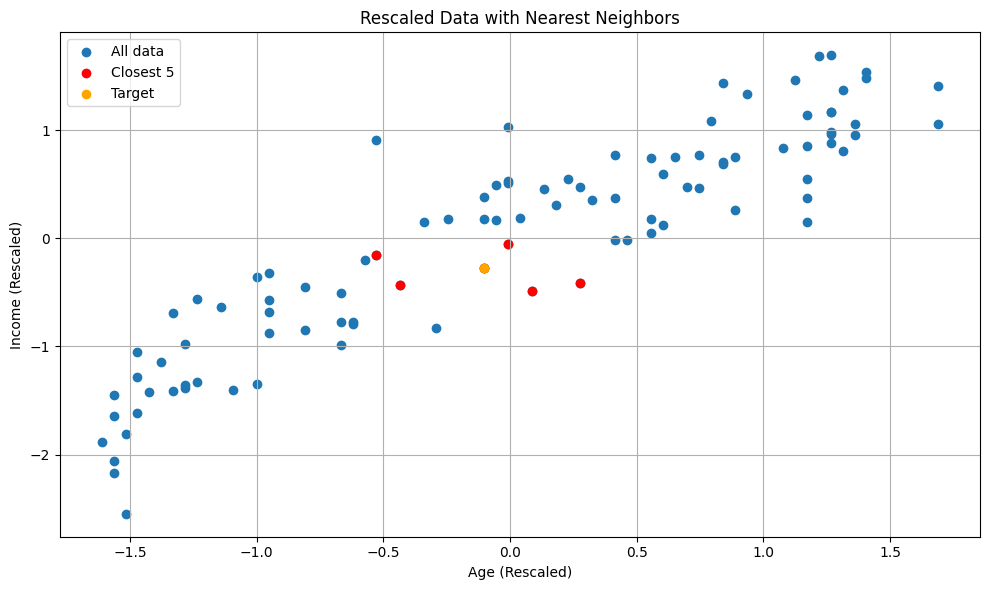

In [ ]:
# Rescale the variables using z-score standardization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Assume 'data' is a DataFrame with columns: 'ID', 'Age', 'Income'
# Also assume 'target_id' is defined and exists in 'data["ID"]'

# Step 1: Scale the Age and Income columns
scaled = data.copy()
scaled['Age_scaled'] = (scaled['Age'] - scaled['Age'].mean()) / scaled['Age'].std()
scaled['Income_scaled'] = (scaled['Income'] - scaled['Income'].mean()) / scaled['Income'].std()

# Step 2: Highlight the data point of interest
highlight_scaled = scaled[scaled['ID'] == TARGET_ID]

# Step 3: Compute distances from the target to all other points
target_row_scaled = highlight_scaled[['Age_scaled', 'Income_scaled']]
distances_scaled = cdist(target_row_scaled, scaled[['Age_scaled', 'Income_scaled']])

# Step 4: Get indices of the 5 closest points (including the target itself)
closest_indices_scaled = np.argsort(distances_scaled.squeeze())[:6]
closest_data_scaled = scaled.iloc[closest_indices_scaled]

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(scaled['Age_scaled'], scaled['Income_scaled'], label='All data')
plt.scatter(closest_data_scaled['Age_scaled'], closest_data_scaled['Income_scaled'], color='red', label='Closest 5')
plt.scatter(highlight_scaled['Age_scaled'], highlight_scaled['Income_scaled'], color='orange', label='Target')
plt.xlabel('Age (Rescaled)')
plt.ylabel('Income (Rescaled)')
plt.title('Rescaled Data with Nearest Neighbors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
closest_data_scaled

,ID,Age,Income,Age_scaled,Income_scaled
84,85,52,48755.090422,-0.102828,-0.278286
47,48,54,54039.373044,-0.008490,-0.053291
95,96,56,43831.451076,0.085847,-0.487926
68,69,45,45091.443457,-0.433008,-0.434278
86,87,60,45599.585523,0.274522,-0.412642
67,68,43,51735.894156,-0.527345,-0.151369


This section covers three popular normalisation methods:

* linear scaling
* Z-score scaling
* log scaling


## 5.1 Linear scaling (Min-Max scaling)

Linear scaling (or min-max scaling) scales all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature, and due to the decreased standard deviations, the effects of the outliers increase. Therefore, **before normalisation, it is recommended to appropriately handle the outliers**.

Linear scaling of a feature is a good choice when all of the following conditions are met:
* The lower and upper bounds of your data don't change much over time.
* The feature contains few or no outliers, and those outliers aren't extreme.
* The feature is approximately uniformly distributed across its range. That is, a histogram would show roughly even bars for most values.

Use the following formula to do the linear scaling of a value $x$ to $x'$:

$$ x' = \frac{x - x_{min}}{x_{max} - x_{min}} $$

where $x_{max}$ and $x_{min}$ stand for the highest and the lowest value of the feature in the dataset, respectively.

**Note:** Most real-world features do not meet all of the criteria for linear scaling. Z-score scaling is typically a better normalisation choice than linear scaling.

In [ ]:
import pandas as pd

def normalize_data(data):
    min_value = min(data)
    max_value = max(data)
    normalized_data = []

    for value in data:
        normalized_value = (value - min_value) / (max_value - min_value)
        normalized_data.append(normalized_value)

    return normalized_data


# Create sample data
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'income': [90000, 130000, 140000, 100000, 60000, 70000,110000, 50000,  80000,  120000]
}

# Create dataframe
df = pd.DataFrame(data)

# Normalize 'age' column
df['age_normalized'] = normalize_data(df['age'])

# Normalize 'income' column
df['income_normalized'] = normalize_data(df['income'])

# Display the dataframe
display(df)

,id,age,income,age_normalized,income_normalized
0,1,25,90000,0.000000,0.444444
1,2,30,130000,0.111111,0.888889
2,3,35,140000,0.222222,1.000000
3,4,40,100000,0.333333,0.555556
4,5,45,60000,0.444444,0.111111
5,6,50,70000,0.555556,0.222222
6,7,55,110000,0.666667,0.666667
7,8,60,50000,0.777778,0.000000
8,9,65,80000,0.888889,0.333333
9,10,70,120000,1.000000,0.777778


## 5.2 Z-score scaling

**Z-score normalisation** (also known as **standardisation**) is a good choice when the data follows a normal distribution or a distribution somewhat like a normal distribution (e.g., vaguely normal).

A **Z-score** is the <ins>number of standard deviations a value is from the mean</ins>. For example, a value that is 2 standard deviations greater than the mean has a Z-score of +2.0. A value that is 1.5 standard deviations less than the mean has a Z-score of -1.5.

The geometric effect of a Z-score normalisation is a linear transformation that centres and rescales the data in a way that preserves relative geometry but changes scale and origin:
* It centres the data at the origin (all transformed features have a mean of 0)
* It scales each feature independently (each feature is rescaled to have unit variance)

Use the following formula to normalise a value $x$ to its Z-score $x'$:
$$ x' = \frac{x - \mu}{\sigma} $$

where $\mu$ and $\sigma$ are the mean and standard deviation of the distribution of the feature containing $x$.

Representing a feature with Z-score scaling means storing that feature's Z-score in the feature vector. For example, the following figure shows two histograms:

- On the left, a classic normal distribution.
- On the right, the same distribution normalised by Z-score scaling.

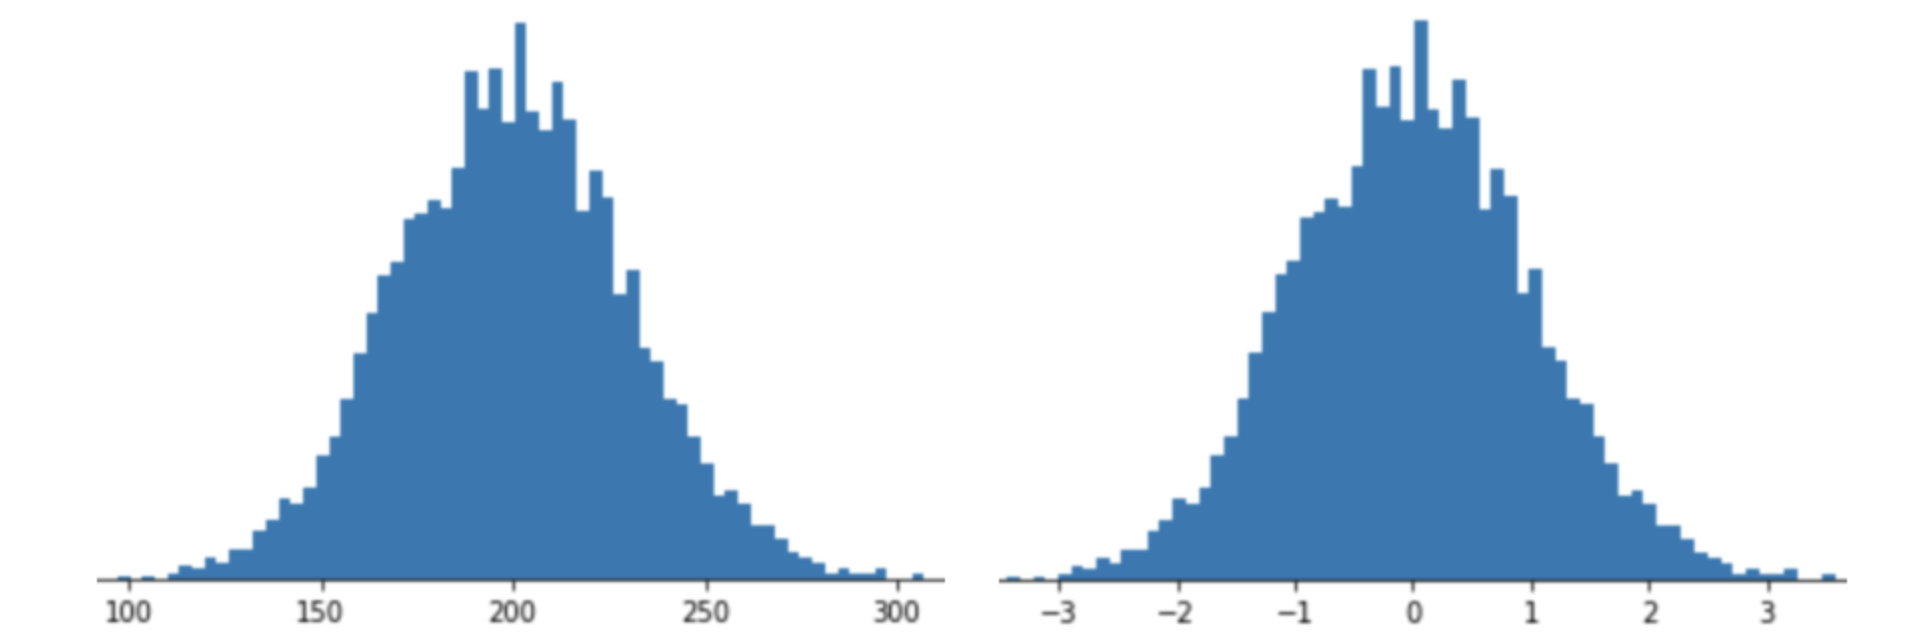

In [16]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/2. Data processing/Z-scaling-1.png')

Z-score scaling is also a good choice for data like that shown in the following figure, which has only a vaguely normal distribution. Raw data (left) versus Z-score scaling (right) for a non-classic normal distribution.

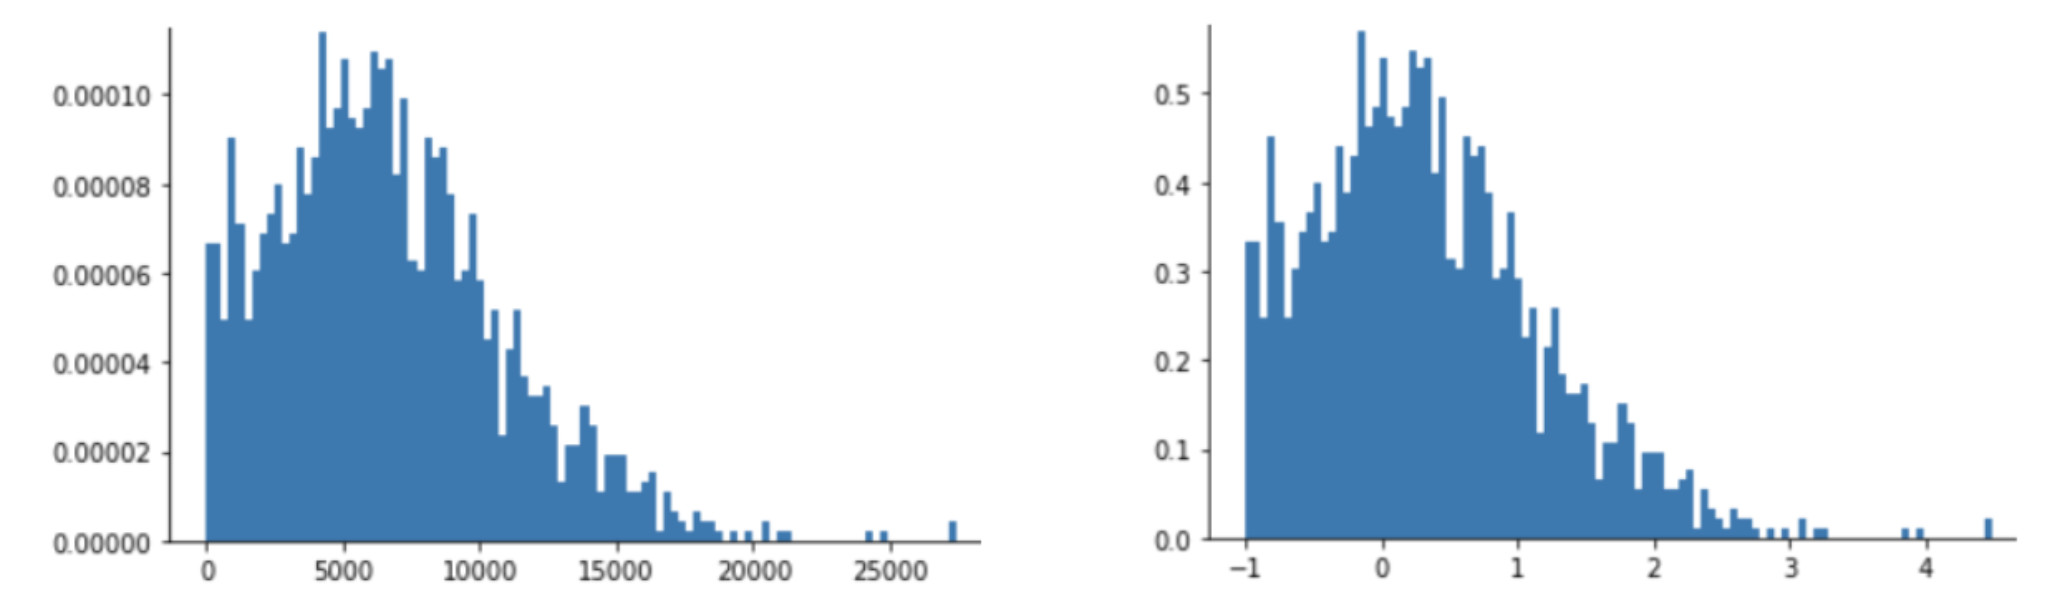

In [17]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/2. Data processing/Z-scaling-2.png')

In [ ]:
import pandas as pd
import numpy as np

# Create sample data
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'income': [90000, 130000, 140000, 100000, 60000, 70000,110000, 50000,  80000,  120000]
}

# Create dataframe
df = pd.DataFrame(data)

# Standardise 'age' column
df['age_standardized'] = (df['age'] - np.mean(df['age'])) / np.std(df['age'])

# Standardise 'income' column
df['income_standardized'] = (df['income'] - np.mean(df['income'])) / np.std(df['income'])

# Display the dataframe
display(df)

,id,age,income,age_standardized,income_standardized
0,1,25,90000,-1.566699,-0.174078
1,2,30,130000,-1.218544,1.218544
2,3,35,140000,-0.870388,1.566699
3,4,40,100000,-0.522233,0.174078
4,5,45,60000,-0.174078,-1.218544
5,6,50,70000,0.174078,-0.870388
6,7,55,110000,0.522233,0.522233
7,8,60,50000,0.870388,-1.566699
8,9,65,80000,1.218544,-0.522233
9,10,70,120000,1.566699,0.870388


## 5.3 Log scaling

Log scaling is particularly useful for features like incomes, word counts, transaction amounts, populations — anywhere there’s a **long-tailed distribution**. As a general rule, apply log scaling (log transform) when your feature values are strictly positive and highly skewed (long right tail).

Log scaling computes the logarithm of the raw value. In theory, the logarithm could be any base; in practice, log scaling usually calculates the natural logarithm (ln).

Let’s use a synthetic income dataset as an example. Incomes are the classic case: most people earn modest amounts, but a few earn extremely large salaries, and hence it represents a very skewed distribution.

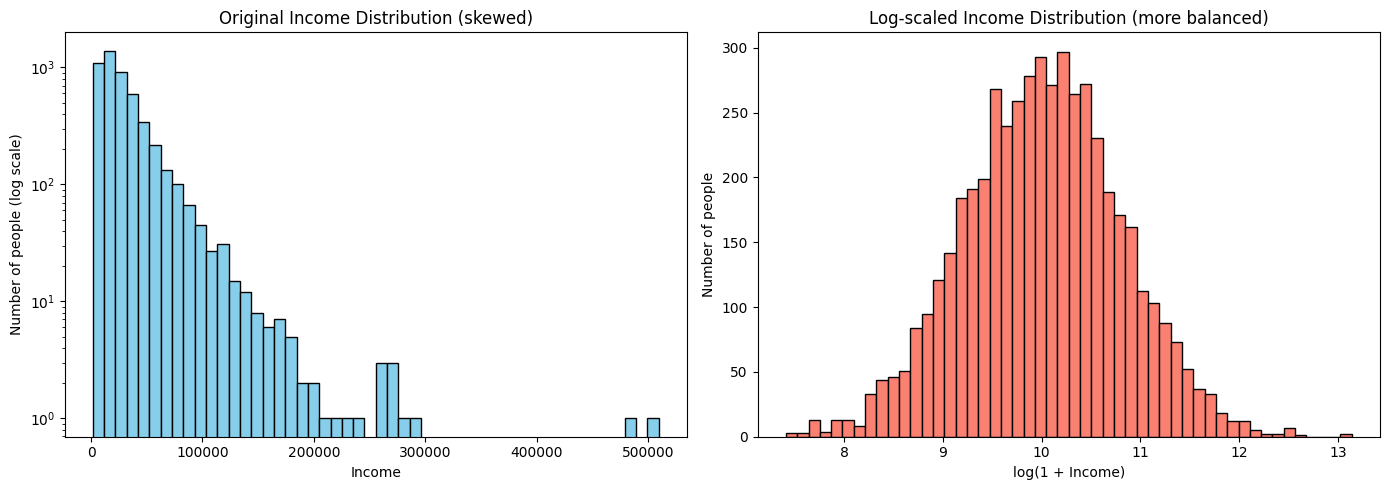

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

np.random.seed(42)

# Generate synthetic income data (log-normal distribution is often used to model incomes)
n = 5000
incomes = np.random.lognormal(mean=10, sigma=0.8, size=n)  # skewed distribution

# Apply log scaling
log_incomes = np.log1p(incomes)

# Plot side by side
plt.figure(figsize=(14, 5))

# Original incomes
plt.subplot(1, 2, 1)
plt.hist(incomes, bins=50, color="skyblue", edgecolor="black", log=True)
plt.xlabel("Income")
plt.ylabel("Number of people (log scale)")
plt.title("Original Income Distribution (skewed)")

# Log-scaled incomes
plt.subplot(1, 2, 2)
plt.hist(log_incomes, bins=50, color="salmon", edgecolor="black")
plt.xlabel("log(1 + Income)")
plt.ylabel("Number of people")
plt.title("Log-scaled Income Distribution (more balanced)")

plt.tight_layout()
plt.show()


**What you see**

- Left plot: Most incomes cluster at low values, but a few extreme values dominate. It is very skewed.

- Right plot: After log scaling, the distribution is more bell-shaped, making it easier for ML models. Taking logs turns a log-normal into a (bell-shaped) normal.

Let's compute the summary statistics before and after log scaling (mean, std, skewness), so you can see the effect of log scaling numerically.

In [ ]:
# Compute summary statistics before and after
summary = pd.DataFrame({
    "Original": {
        "Mean": np.mean(incomes),
        "Std": np.std(incomes),
        "Skewness": skew(incomes),
        "Kurtosis": kurtosis(incomes)
    },
    "Log-Scaled": {
        "Mean": np.mean(log_incomes),
        "Std": np.std(log_incomes),
        "Skewness": skew(log_incomes),
        "Kurtosis": kurtosis(log_incomes)
    }
})

summary

,Original,Log-Scaled
Mean,30404.461552,10.004544
Std,29165.943469,0.797054
Skewness,4.180984,-0.011780
Kurtosis,37.603088,0.040108


Original incomes are heavily skewed, with extreme outliers. After log scaling, the data becomes much closer to normal — mean and variance stabilise, skewness (asymmetry of the distribution) and kurtosis (tailedness) almost disappear.

## 5.4 Summary of normalisation techniques

| Normalisation technique| When to use                                               |
| ---------------------- | --------------------------------------------------------- |
| **Linear scaling**      | When the feature is mostly uniformly distributed across the range. **Flat-shaped**                             |
| **Z-score scaling** | When the feature is normally distributed (peak close to the mean). **Bell-shaped**   |
| **Log scaling** | When the feature distribution is heavily skewed on at least one side of the tail. **Heavy Tail-shaped** |







## Exercise

Using the same data frame as in the chart example:
* Normalise data
* Check if you get the same 4 closest neighbours as in the example (id = 71)
* Denormalise data: get the normalised variables back to the original value

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n = 100  # Number of data points
age = np.random.randint(20, 91, size=n)
income = age * 1000 + np.random.normal(0, 10000, size=n)
id = np.arange(1, n+1)

# Create a DataFrame from the data
data = pd.DataFrame({'ID': id, 'Age': age, 'Income': income})

**Solution:**

,ID,Age,Income,Age_normalized,Income_normalized,Age_denormalized,Income_denormalized
0,1,71,80729.635338,0.728571,0.856206,71.0,80729.635338
1,2,34,41955.954639,0.200000,0.466927,34.0,41955.954639
2,3,80,94954.342529,0.857143,0.999019,80.0,94954.342529
3,4,40,43381.812520,0.285714,0.481242,40.0,43381.812520
4,5,43,76722.962536,0.328571,0.815980,43.0,76722.962536
...,...,...,...,...,...,...,...
95,96,56,43831.451076,0.514286,0.485757,56.0,43831.451076
96,97,63,73493.473923,0.614286,0.783557,63.0,73493.473923
97,98,54,67251.056615,0.485714,0.720884,54.0,67251.056615
98,99,84,91345.010649,0.914286,0.962782,84.0,91345.010649


4 neighbors using scalation:


,ID,Age,Income,Age_scalated,Income_scalated
84,85,52,48755.090422,-0.102828,-0.278286
47,48,54,54039.373044,-0.008490,-0.053291
95,96,56,43831.451076,0.085847,-0.487926
68,69,45,45091.443457,-0.433008,-0.434278
86,87,60,45599.585523,0.274522,-0.412642


4 neighbors using normalization:


,ID,Age,Income,Age_normalized,Income_normalized,Age_denormalized,Income_denormalized
84,85,52,48755.090422,0.457143,0.535189,52.0,48755.090422
47,48,54,54039.373044,0.485714,0.588242,54.0,54039.373044
95,96,56,43831.451076,0.514286,0.485757,56.0,43831.451076
90,91,53,59176.408455,0.471429,0.639817,53.0,59176.408455
68,69,45,45091.443457,0.357143,0.498407,45.0,45091.443457


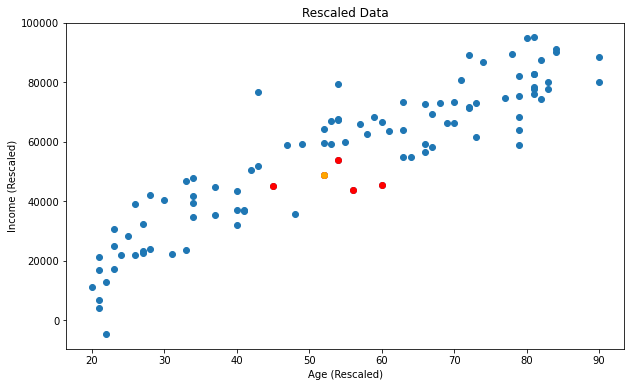

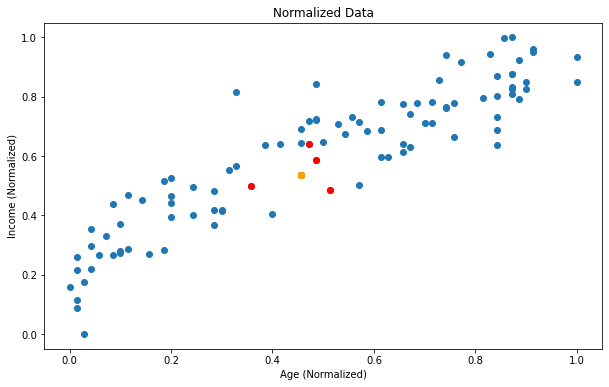

## Class Exercise

Let's consider the Titanic dataset. The dataset contains the details of a subset of the passengers who boarded the Titanic, and importantly, it reveals whether they survived or not. The features are:

- survival:	0 = No, 1 = Yes
- pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex: male, female
- Age: years
- sibsp: # of siblings/spouses aboard the Titanic
- parch: # of parents/children aboard the Titanic
- ticket: ticket number
- fare: passenger fare
- cabin: cabin number
- embarked: Port C = Cherbourg, Q = Queenstown, S = Southampton

Try to apply the different techniques that we have learnt during the class to prepare the Titanic dataset for a machine learning algorithm:

- Deletions
- Imputations
- Feature Engineering
- Encode categorical variables
- Visualisation of the two variables with greater influence on the probability of surviving

Create visual plots to investigate the following questions:

- How many people survived? 
- How many people survived by gender?
- How many survived by ticket class?

In [1]:
from sklearn.datasets import fetch_openml
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context

# Load the Titanic dataset from scikit-learn
titanic = fetch_openml('titanic', version=1)

# Convert the dataset to a Pandas DataFrame
titanic_df = pd.DataFrame(data=titanic.data, columns=titanic.feature_names)
titanic_df['survival'] = titanic.target  # Add the target column

# Remove columns
columns_to_remove = ['boat', 'body', 'home.dest', 'name']
titanic_df.drop(columns=columns_to_remove, inplace=True)

# Display the first few rows of the DataFrame
titanic_df.head()

ModuleNotFoundError: No module named 'sklearn'

## 6. Machine Learning development and testing. Dividing the original dataset into training, validation, and test sets

After preprocessing (cleaning) your data and performing feature engineering to transform data values into trainable values in a feature vector, you will be ready to learn from it by means of some machine learning algorithm. In the next lectures, we will dive into some classic machine learning algorithms that will help us learn from data to produce a **model**.

We should test a model against a different set of examples from those used to train the model. As we will learn a little later, testing on different examples is stronger proof of our model's fitness than testing on the same set of examples. Where do we get those different examples? Traditionally, in machine learning, we get those different examples by splitting the original dataset into three subsets:
* A **training set** to train the ML algorithm of choice.
* A **validation set** to perform the initial testing on the model as it is being trained (learned).
* A **test set** to evaluate the trained model.

After splitting a dataset into training, validation, and test sets, delete any examples in the validation set or test set that are duplicates of examples in the training set. The only fair test of a model is against new examples, not duplicates.
Use the validation set to evaluate results from the training set. After repeated use of the validation set suggests that your model is making good predictions, use the test set to double-check your model.
In summary, a good test set or validation set meets all of the following criteria:
* Large enough to yield statistically significant testing results.
* Representative of the dataset as a whole. In other words, don't pick a test set with different characteristics from the training set.
* Representative of the real-world data that the model will encounter as part of its business purpose.
* Zero examples duplicated in the training set.

The following figure shows a general workflow for machine learning development and testing.

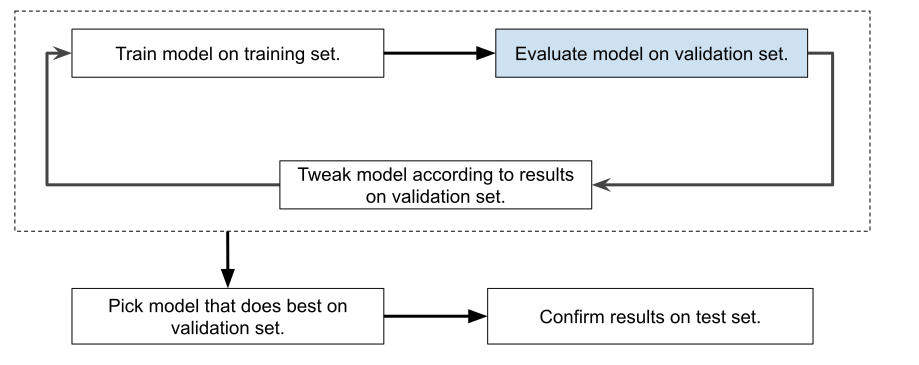

In [18]:
Image.open('/content/drive/MyDrive/Class 25-26/3.Images/2. Data processing/workflow_with_validation_set.png')